# Example of light sources

## Creating an instance
An instance must be created before starting to operate with light sources. The initialization accepts several arguments.   

In [3]:
from diffractio import np, plt
from diffractio import degrees, mm, um
from diffractio.diffractio import Diffractio 
from diffractio.scalar_sources_X import Scalar_source_X

## Plane wave

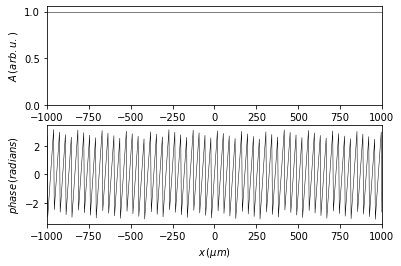

In [2]:
x0 = np.linspace(-1000 * um, 1000 * um, 512)
wavelength = 0.6328 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(theta=1 * degrees, z0=0 * um)
u0.draw(kind="field")

## Gauss beam

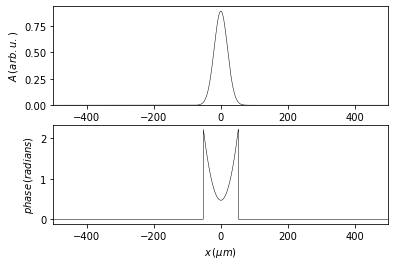

In [3]:
x0 = np.linspace(-500 * um, 500 * um, 2048)
wavelength = 0.5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=-2000 * um, w0=25 * um, theta=0 * degrees)

u0.draw(kind="field")

## Spherical wave

**Convergent**

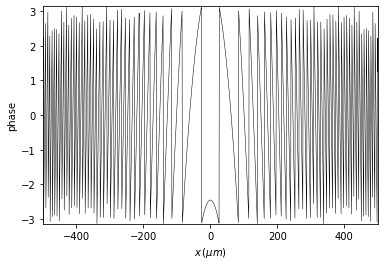

In [4]:
x0 = np.linspace(-500 * um, 500 * um, 1024)
wavelength = 0.6328 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.spherical_wave(A=1, x0=0 * um, z0=5 * mm)
u0.draw(kind="phase")

**Divergent**

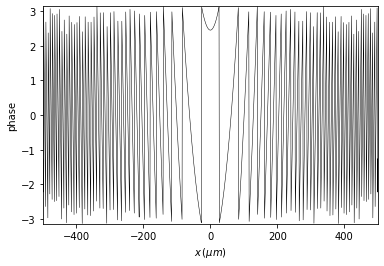

In [5]:
x0 = np.linspace(-500 * um, 500 * um, 1024)
wavelength = 0.6328 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.spherical_wave(A=1, x0=0 * um, z0=-5 * mm)
u0.draw(kind="phase")

## Wavelets

Sum of different spherical waves or gauss beams.

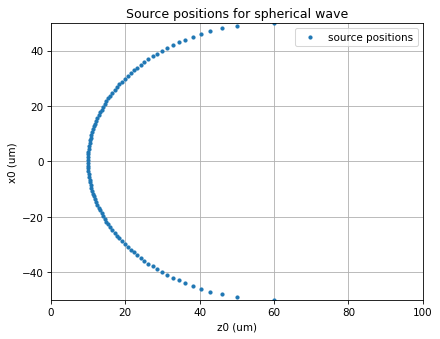

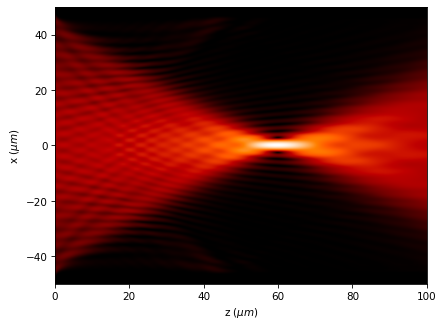

In [14]:
x0 = np.linspace(-50 * um, 50 * um, 1024)
z0 = np.linspace(0,100*um, 1000)

wavelength = 3 * um
k = 2 * np.pi / wavelength


x0s = np.linspace(-50 * um, 50 * um, 100)
z0s = 60 - np.sqrt(50**2 - x0s**2) *um 

plt.plot(z0s, x0s, '.', label='source positions')
plt.xlabel('z0 (um)')
plt.ylabel('x0 (um)')
plt.title('Source positions for spherical wave')
plt.grid()
plt.legend()
plt.xlim(0, 100)
plt.ylim(-50, 50)

amplitudes = np.ones_like(x0s)

u1 = Diffractio('scalar', 'source', x=x0, wavelength=wavelength)
u1.wavelets('spherical', x0s, z0s, amplitudes, phases=0)
u1.normalize()

uxz = Diffractio('scalar', 'field', x=x0, z=z0, wavelength=wavelength)
uxz.incident_field(u1)
uxz.WPM()
uxz.draw(kind="intensity", logarithm = 1e1)


## Several plane waves with different inclination

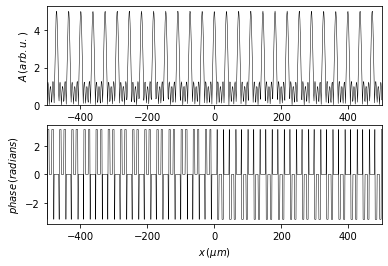

In [6]:
x0 = np.linspace(-500 * um, 500 * um, 1024)
wavelength = 0.6328 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_waves_several_inclined(A=1, num_beams=5, max_angle=5 * degrees)
u0.draw(kind="field")

## Several gauss beams with different position

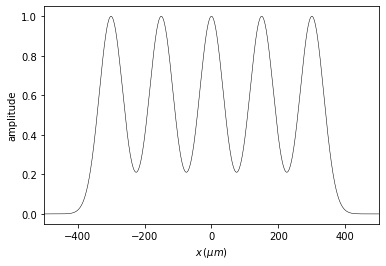

In [7]:
x0 = np.linspace(-500 * um, 500 * um, 1024)
wavelength = 0.6328 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beams_several_parallel(
    A=1,
    num_beams=5,
    w0=50 * um,
    z0=0 * um,
    x_central=0 * um,
    x_range=750 * um,
    theta=0 * degrees,
)
u0.draw(kind="amplitude")

## Several Gauss beam with different inclination

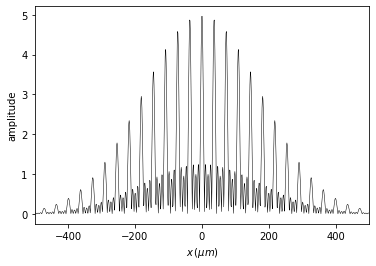

In [8]:
x0 = np.linspace(-500 * um, 500 * um, 1024)
wavelength = 0.6328 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beams_several_inclined(
    A=1, num_beams=5, w0=250 * um, x0=0 * um, z0=0 * um, max_angle=5 * degrees
)
u0.draw(kind="amplitude")

## Sum of two gauss beams with different inclination: interference

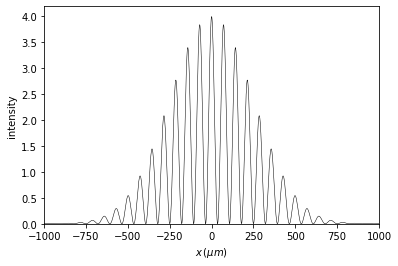

In [9]:
length = 2 * mm
x0 = np.linspace(-length / 2, length / 2, 1024)
wavelength0 = 0.6238 * um

u1 = Scalar_source_X(x=x0, wavelength=wavelength0)
u2 = Scalar_source_X(x=x0, wavelength=wavelength0)

u1.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=500 * um, theta=0.25 * degrees)
u2.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=500 * um, theta=-0.25 * degrees)

u0 = u1 + u2
u0.draw(kind="intensity")